In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
cfar100 = tf.keras.datasets.cifar100
(X_train, Y_train), (X_test, Y_test) = cfar100.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)

In [3]:

model = tf.keras.models.Sequential([                             
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(100, activation='softmax')
])

In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])


In [5]:
model_output = model.fit(X_train, Y_train, epochs = 10)
model.evaluate(X_test, Y_test)

Epoch 1/10
1563/1563 [==============================] - 78s 48ms/step - loss: 3.8776 - accuracy: 0.1051
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 3.2788 - accuracy: 0.2002
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 3.0102 - accuracy: 0.2498
Epoch 4/10
1563/1563 [==============================] - 83s 53ms/step - loss: 2.8357 - accuracy: 0.2861
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 2.7081 - accuracy: 0.3092
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 2.6030 - accuracy: 0.3281
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 2.5130 - accuracy: 0.3481
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 2.4360 - accuracy: 0.3654
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 2.3692 - accuracy: 0.3792
Epoch 10/10
313/313 [==============================] - 2s 6ms/st

[2.904982328414917, 0.30660000443458557]

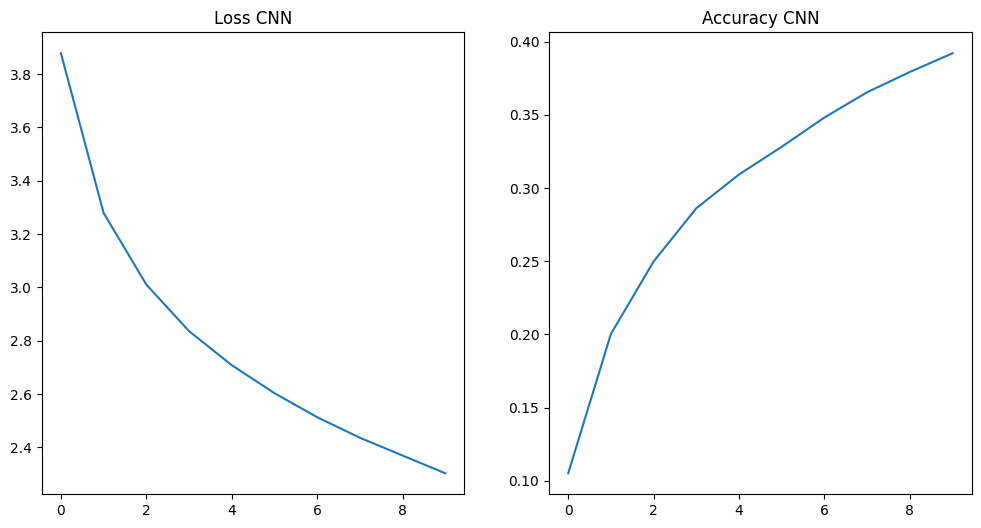

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(model_output.history['loss'])
ax1.set_title("Loss CNN")
ax2.plot(model_output.history['accuracy'])
ax2.set_title("Accuracy CNN")
plt.show()